In [1]:
import phi_intensity

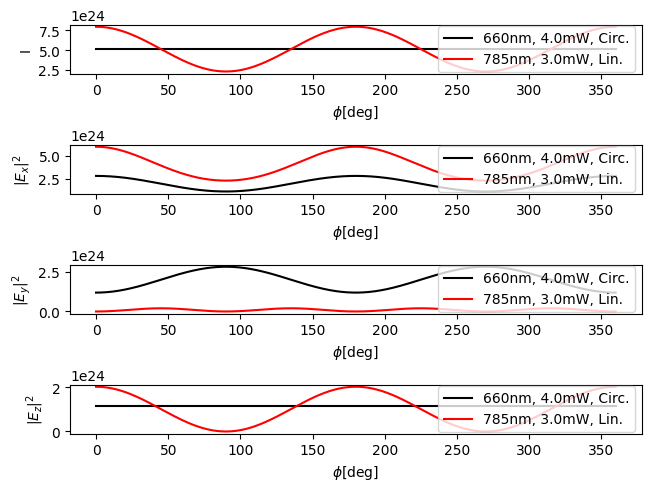

In [2]:
# Parameters
radius = 250e-9 # Fiber Radius [m]
a = 200e-9 # Particle size [m]
core_index = 1.45
clad_index = 1.0
P660 = 4.0e-3
P785 = 3.0e-3

phi_intensity.main(radius=radius,
                   a=a,
                   core_index=core_index,
                   clad_index=clad_index,
                   P660=P660,
                   P785=P785)

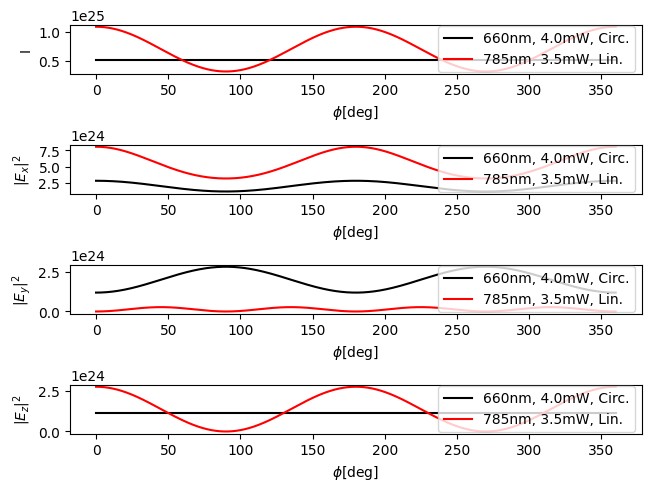

In [3]:
# Parameters
radius = 250e-9 # Fiber Radius [m]
a = 200e-9 # Particle size [m]
core_index = 1.45
clad_index = 1.0
P660 = 4.0e-3
P785 = 3.5e-3

phi_intensity.main(radius=radius,
                   a=a,
                   core_index=core_index,
                   clad_index=clad_index,
                   P660=P660,
                   P785=P785)

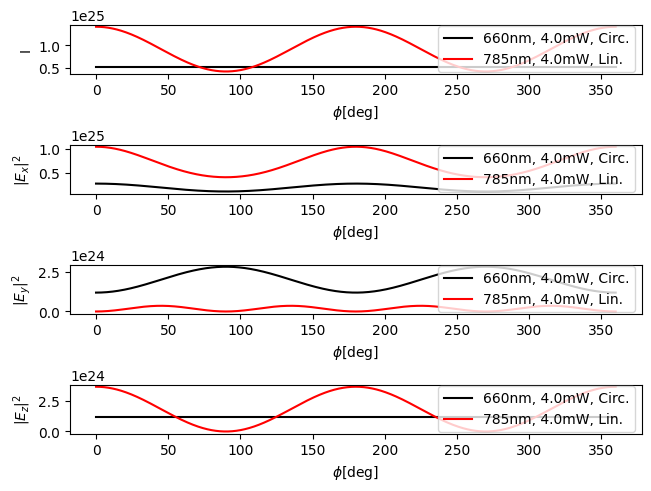

In [4]:
# Parameters
radius = 250e-9 # Fiber Radius [m]
a = 200e-9 # Particle size [m]
core_index = 1.45
clad_index = 1.0
P660 = 4.0e-3
P785 = 4.0e-3

phi_intensity.main(radius=radius,
                   a=a,
                   core_index=core_index,
                   clad_index=clad_index,
                   P660=P660,
                   P785=P785)